In [6]:
import pandas as pd
import numpy as np 
import io
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

In [14]:
img=io.imread(r"C:\Users\HP\OneDrive\Desktop\pca\uploads\car.jpg")
img.shape

(427, 640, 3)

In [15]:
img

array([[[112,  87,  75],
        [115,  89,  77],
        [117,  92,  80],
        ...,
        [131,  87,  66],
        [131,  87,  66],
        [131,  87,  66]],

       [[115,  89,  77],
        [117,  92,  80],
        [119,  94,  82],
        ...,
        [131,  87,  66],
        [131,  87,  66],
        [131,  87,  66]],

       [[117,  92,  80],
        [119,  94,  82],
        [123,  97,  85],
        ...,
        [132,  88,  67],
        [132,  88,  67],
        [132,  88,  67]],

       ...,

       [[150, 117, 110],
        [150, 117, 110],
        [150, 117, 110],
        ...,
        [109,  92,  98],
        [109,  92,  98],
        [109,  92,  98]],

       [[149, 116, 108],
        [149, 116, 108],
        [149, 116, 108],
        ...,
        [109,  92,  98],
        [109,  92,  98],
        [109,  92,  98]],

       [[149, 116, 108],
        [149, 116, 108],
        [149, 116, 108],
        ...,
        [109,  92,  98],
        [109,  92,  98],
        [109,  92,  98]]

In [16]:
gray_img = color.rgb2gray(img)
gray_img

array([[0.35861686, 0.36729333, 0.37822471, ..., 0.37190549, 0.37190549,
        0.37190549],
       [0.36729333, 0.37822471, 0.38606784, ..., 0.37190549, 0.37190549,
        0.37190549],
       [0.37822471, 0.38606784, 0.39866588, ..., 0.37582706, 0.37582706,
        0.37582706],
       ...,
       [0.48434431, 0.48434431, 0.48434431, ..., 0.37664745, 0.37664745,
        0.37664745],
       [0.48014   , 0.48014   , 0.48014   , ..., 0.37664745, 0.37664745,
        0.37664745],
       [0.48014   , 0.48014   , 0.48014   , ..., 0.37664745, 0.37664745,
        0.37664745]])

In [17]:
gray_img.shape

(427, 640)

Text(0.5, 1.0, 'Original img')

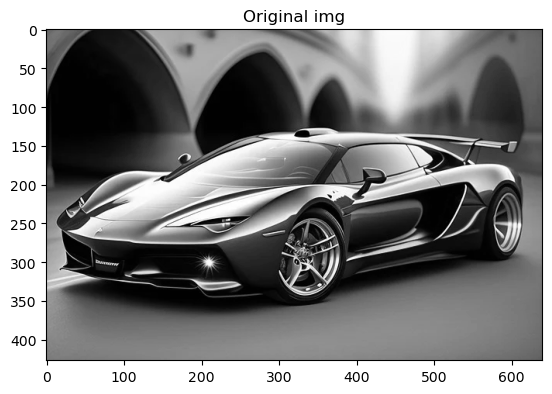

In [18]:
plt.imshow(gray_img,cmap="gray")
plt.title("Original img")

In [19]:
pca=PCA(n_components=0.95)

In [20]:
transformed_img = pca.fit_transform(gray_img)

In [21]:
reconstructed_img = pca.inverse_transform(transformed_img)

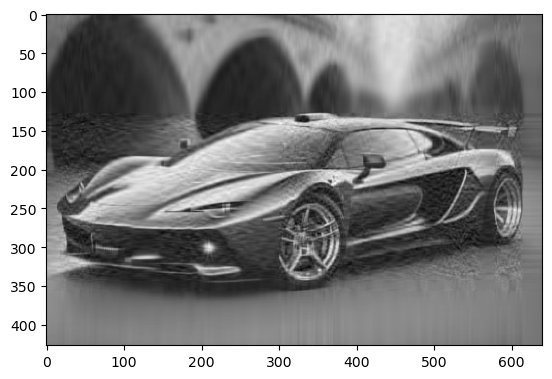

In [22]:
plt.imshow(reconstructed_img,cmap="gray")

In [24]:
#Normalize the data
compressed_image_normalize =(reconstructed_img - reconstructed_img.min())/(reconstructed_img.max() - reconstructed_img.min())
compressed_image_normalize

array([[0.4367747 , 0.44069955, 0.44291186, ..., 0.41541159, 0.41508336,
        0.4149154 ],
       [0.43722285, 0.44248634, 0.44606322, ..., 0.41590341, 0.41559178,
        0.41545422],
       [0.43852274, 0.44489755, 0.44969254, ..., 0.41733685, 0.4170495 ,
        0.41692145],
       ...,
       [0.51074541, 0.50855886, 0.5066492 , ..., 0.45561939, 0.45560786,
        0.45567282],
       [0.50779482, 0.50539468, 0.50324682, ..., 0.45454448, 0.45451977,
        0.45458281],
       [0.50570679, 0.50329691, 0.50124237, ..., 0.45365109, 0.45362537,
        0.45369152]])

In [25]:
compressed_image_normalize.max()

1.0

In [26]:
convert_img_bit = img_as_ubyte(compressed_image_normalize)

In [27]:
io.imsave("compressed_img.jpg", convert_img_bit)